In [127]:
import os
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import random as rd
import math
from matplotlib.patches import ConnectionPatch

In [161]:
simA = cv2.imread(os.path.join('input', 'simA.jpg'), cv2.IMREAD_GRAYSCALE) 
simB = cv2.imread(os.path.join('input', 'simB.jpg'), cv2.IMREAD_GRAYSCALE) 
transA = cv2.imread(os.path.join('input', 'transA.jpg'), cv2.IMREAD_GRAYSCALE) 
transB = cv2.imread(os.path.join('input', 'transB.jpg'), cv2.IMREAD_GRAYSCALE) 

## 4.1.a

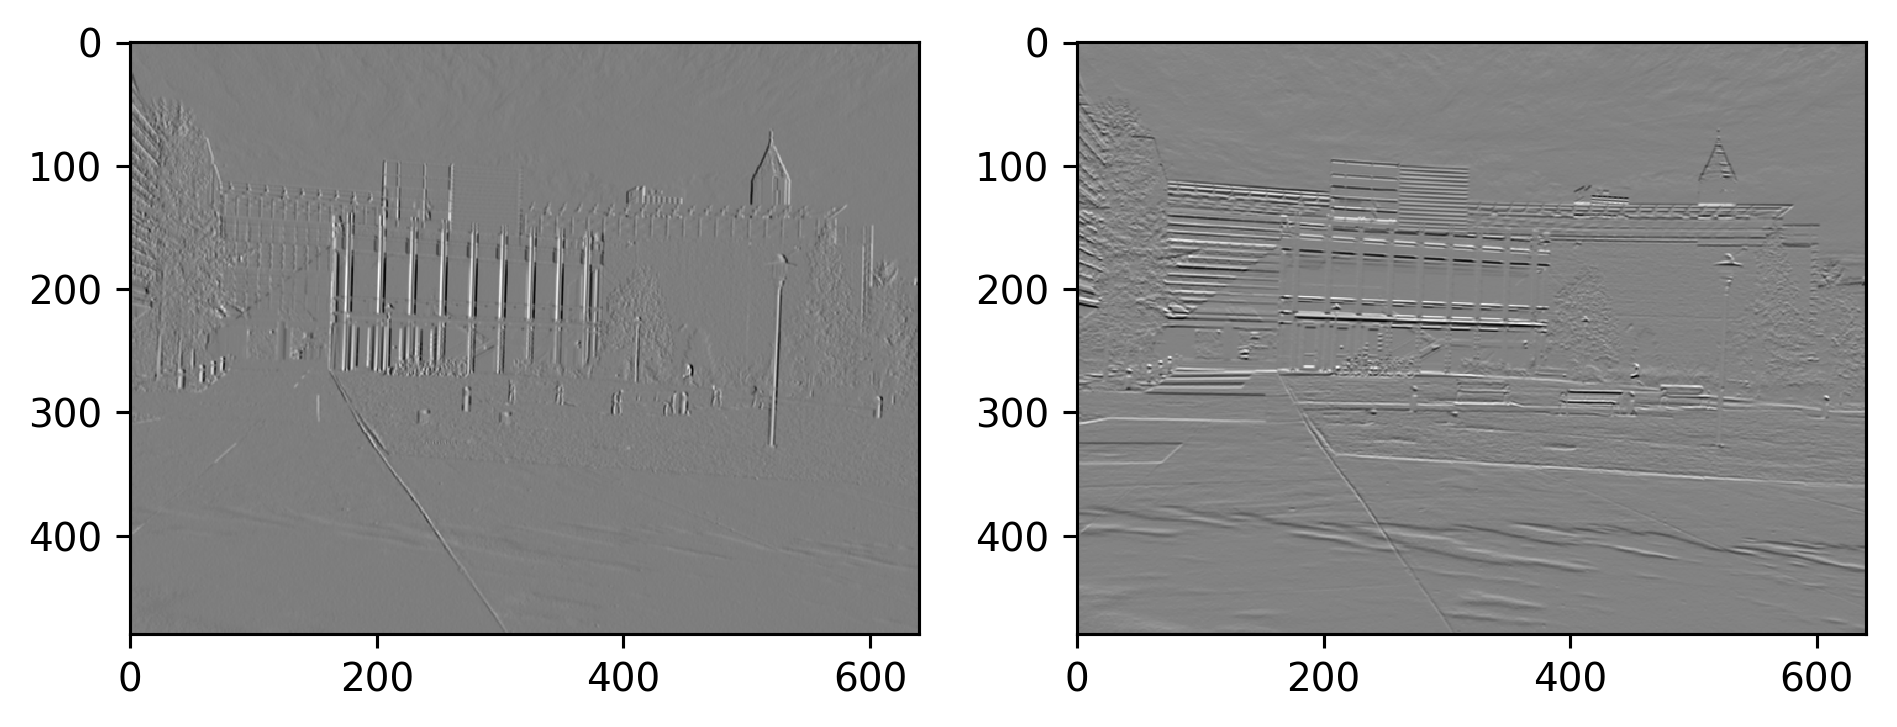

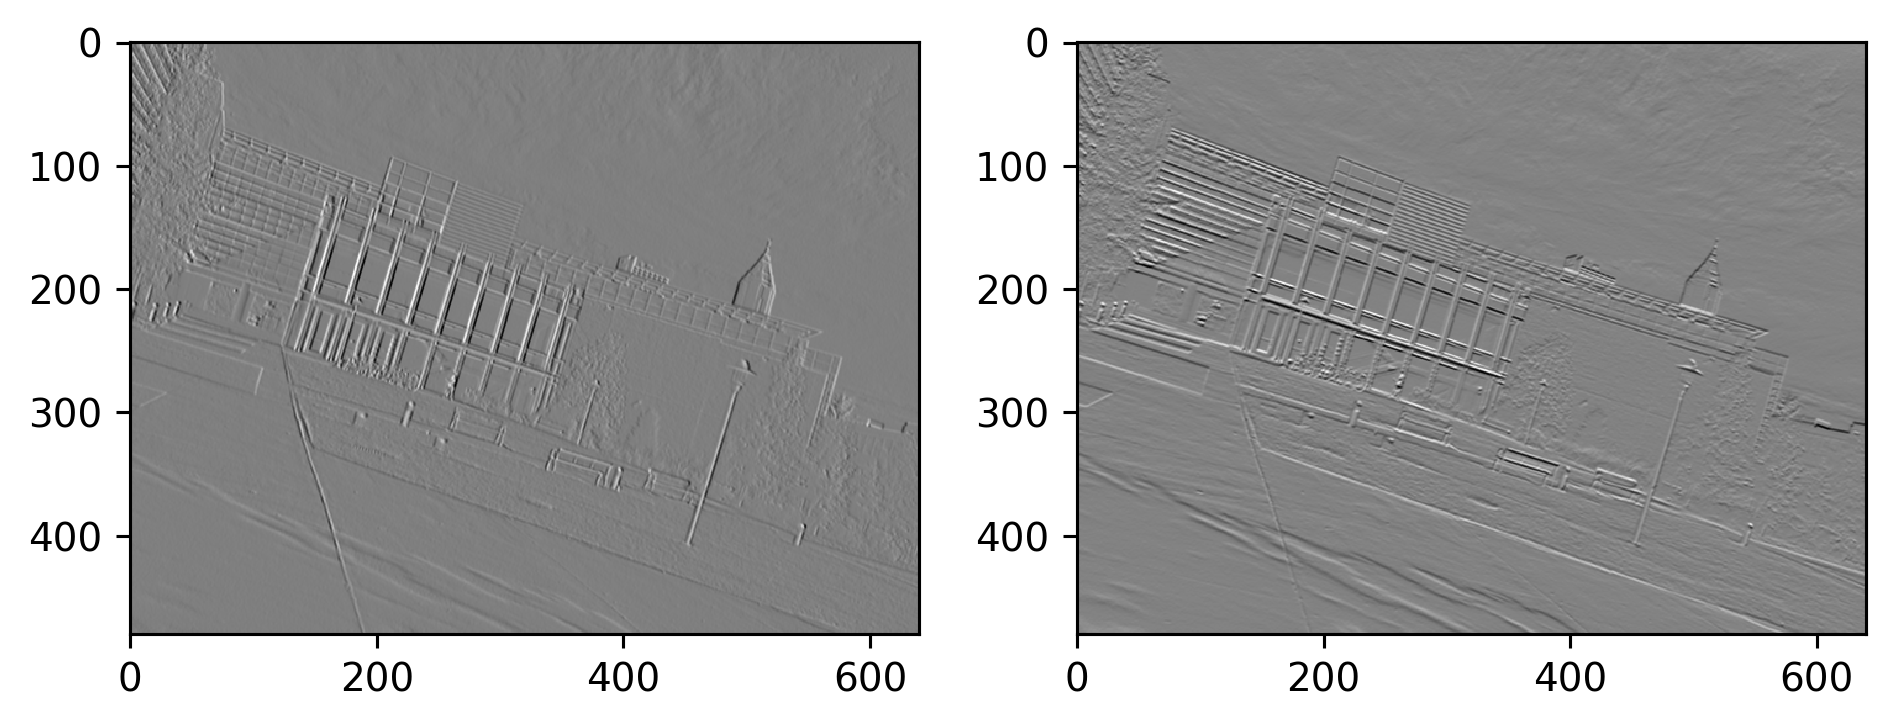

In [3]:
kernel_size = 3
sobelx_simA = cv2.Sobel(simA,cv2.CV_64F,1,0,ksize=kernel_size)
sobely_simA = cv2.Sobel(simA,cv2.CV_64F,0,1,ksize=kernel_size)

sobelx_disp_simA = (sobelx_simA + 1000)/2000 * 256
sobely_disp_simA = (sobely_simA + 1000)/2000 * 256

fig = plt.figure(figsize=(8, 8), dpi=280,)
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(sobelx_disp_simA, cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(sobely_disp_simA, cmap='gray')

kernel_size = 3
sobelx_simB = cv2.Sobel(simB,cv2.CV_64F,1,0,ksize=kernel_size)
sobely_simB = cv2.Sobel(simB,cv2.CV_64F,0,1,ksize=kernel_size)

sobelx_disp_simB = (sobelx_simB + 1000)/2000 * 256
sobely_disp_simB = (sobely_simB + 1000)/2000 * 256

fig = plt.figure(figsize=(8, 8), dpi=280,)
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(sobelx_disp_simB, cmap='gray')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(sobely_disp_simB, cmap='gray')


## 4.1.b

In [25]:
w_size = 4
kernel_size = 3
weight = np.ones((w_size, w_size))
alpha = 0.04
def harris_corner(img, w_size, alpha):
    gradient_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=kernel_size)
    gradient_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=kernel_size)
    
    harris_mat = np.zeros(img.shape)
    row_num = img.shape[0]
    col_num = img.shape[1]
    w_size_half = w_size/2
    
    for r in range(row_num):
        for c in range(col_num):
            M = np.matrix(np.zeros((2,2)))
            for i in range(w_size):  # Rows
                for j in range(w_size): # Coloumns
                    w = weight[i][j]
                    
                    curr_r = int(r + i - w_size_half)
                    curr_c = int(c + j - w_size_half)
                    Ix = 0
                    Iy = 0
                    if not(curr_c < 0 or curr_c >= col_num or curr_r < 0 or curr_r >= row_num):
                        Ix = gradient_x[curr_r][curr_c]
                        Iy = gradient_y[curr_r][curr_c]
                            
                    
                    curr_M = np.matrix([[Ix**2, Ix * Iy],[Ix * Iy, Iy**2]])
                    M += curr_M * w
            harris_mat[r][c] = np.linalg.det(M) - alpha * np.trace(M) **2
        if c == col_num - 1 and r % 50 == 0:
            print(r, c)
    return harris_mat



In [14]:
harris_mat = np.matrix.copy(harris_mat_temp)
def threshold(mat, R):
    row_num = mat.shape[0]
    col_num = mat.shape[0]
    mat[mat < R] = 0
            
def non_maximal_supression(mat, w_size):
    w_size_half = int(w_size/2)
    row_num = mat.shape[0]
    col_num = mat.shape[1]
    mat_res = np.matrix.copy(mat)
    for r in range(row_num):
        for c in range(col_num):
            min_r = r - w_size_half if r - w_size_half >=0 else 0
            min_c = c - w_size_half if c - w_size_half >= 0 else 0
            max_r = r + w_size_half if r + w_size_half < row_num else row_num - 1
            max_c = c + w_size_half if c + w_size_half < col_num else col_num - 1
            
            submat = mat[min_r:max_r, min_c:max_c] 
            max_mat = np.max(submat)
            submat[submat < max_mat] = 0


## 4.2.a

In [45]:

def sift_descriptor(img, harris_points):
    gradient_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=kernel_size)
    gradient_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=kernel_size)
    sift_points = []
    for i in range(len(harris_points[0])):
        x=harris_points[1][i]
        y=harris_points[0][i]
        angle = np.arctan2(gradient_y[y][x], gradient_x[y][x])
        point = cv2.KeyPoint(x=x,y=y, _size = 3, _angle = angle, _octave=0)
        sift_points.append(point)

        sift = cv2.xfeatures2d.SIFT_create()
    points, descriptors = sift.compute(img,sift_points)
    return points, descriptors


In [123]:
imgA = transA
imgB = transB

# def sift_match(imgA, imgB, w_size = 4, alpha = 0.04):
harris_mat_A = harris_corner(imgA, w_size, alpha)
harris_mat_B = harris_corner(imgB, w_size, alpha)

threshold(harris_mat_A, 500000000000)
threshold(harris_mat_B, 500000000000)

non_maximal_supression(harris_mat_A, 5)
non_maximal_supression(harris_mat_B, 5)

points_A = np.nonzero(harris_mat_A)
points_B = np.nonzero(harris_mat_B)

0 639
50 639
100 639
150 639
200 639
250 639
300 639
350 639
400 639
450 639
0 639
50 639
100 639
150 639
200 639
250 639
300 639
350 639
400 639
450 639


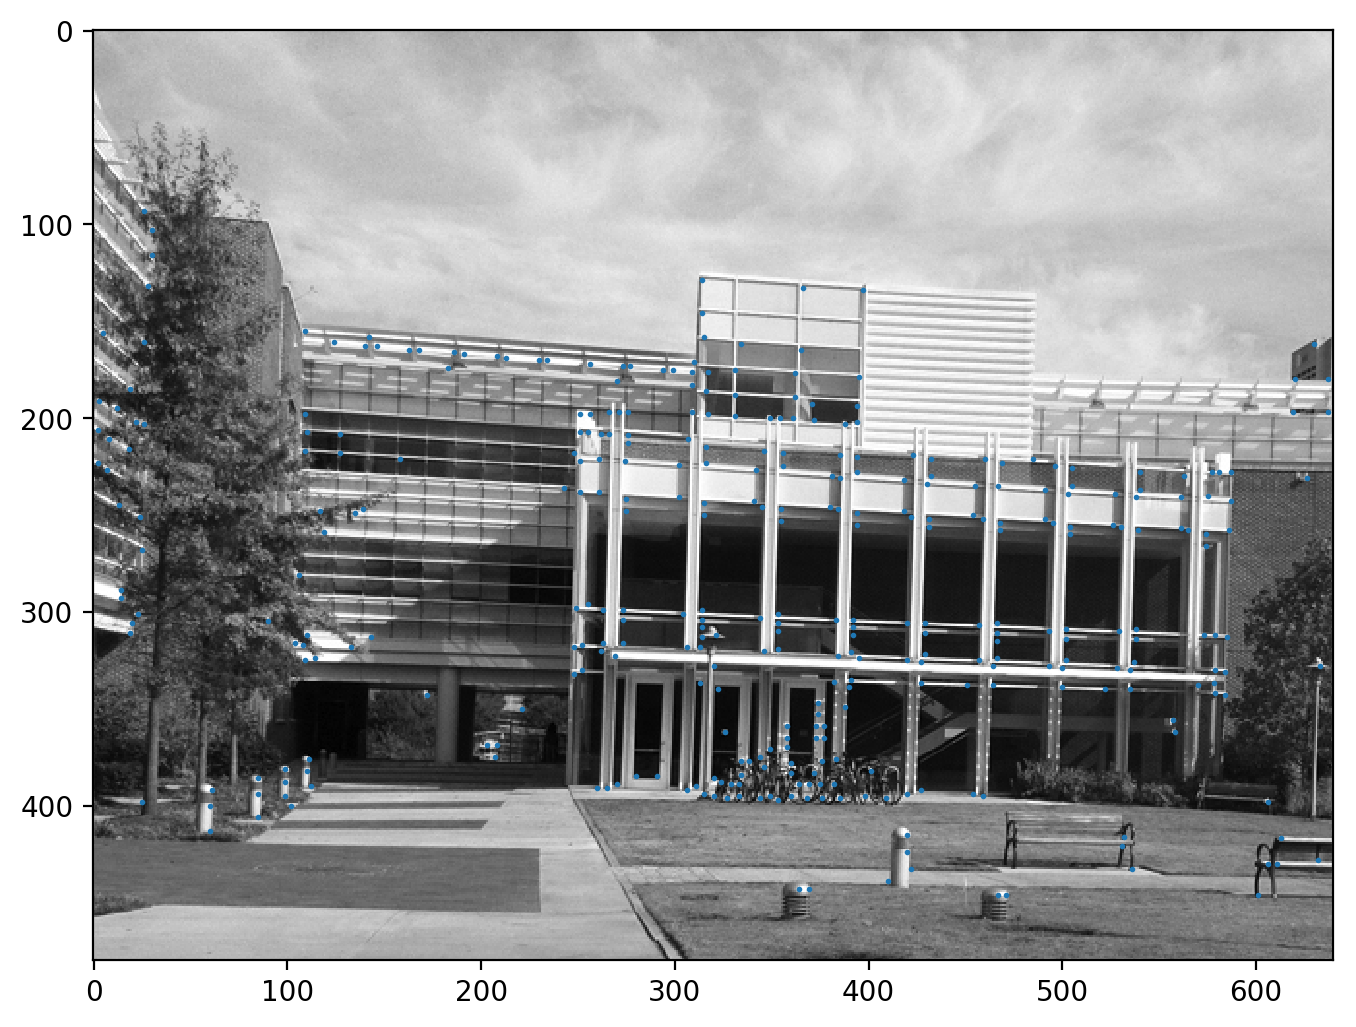

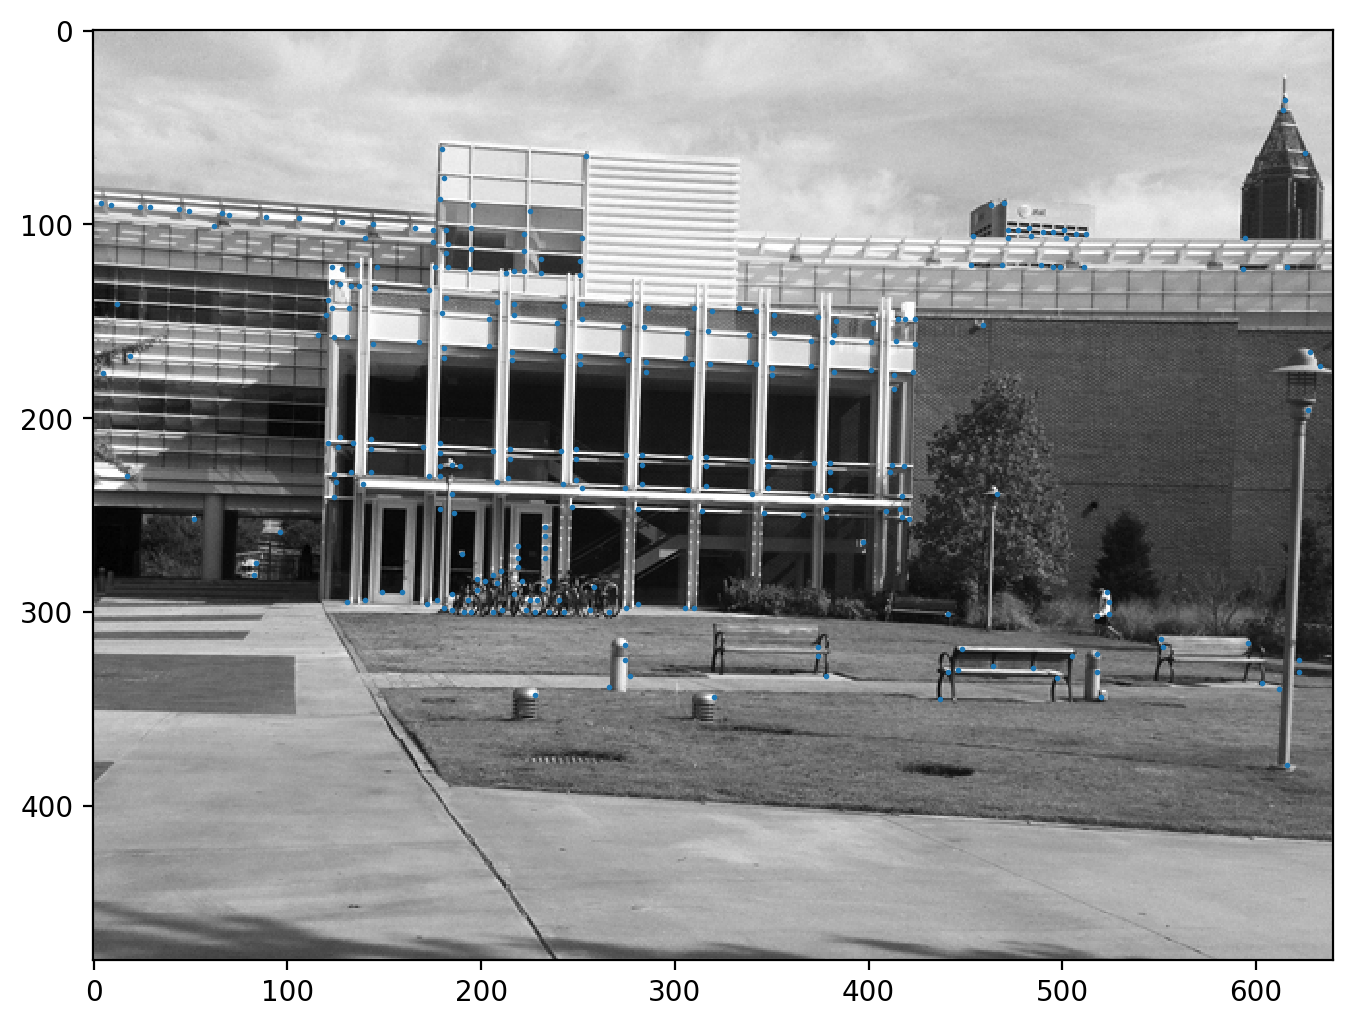

In [128]:
fig = plt.figure(figsize=(8, 8), dpi=200,)
plt.imshow(transA, cmap='gray')
plt.scatter(points_A[1], points_A[0], s = 1)

fig = plt.figure(figsize=(8, 8), dpi=200,)
plt.imshow(transB, cmap='gray')
plt.scatter(points_B[1], points_B[0], s = 1)

p_a, d_a = sift_descriptor(transA, points_A)
p_b, d_b = sift_descriptor(transB, points_B)
bfm = cv2.BFMatcher()
matches = bfm.match(d_a, d_b)

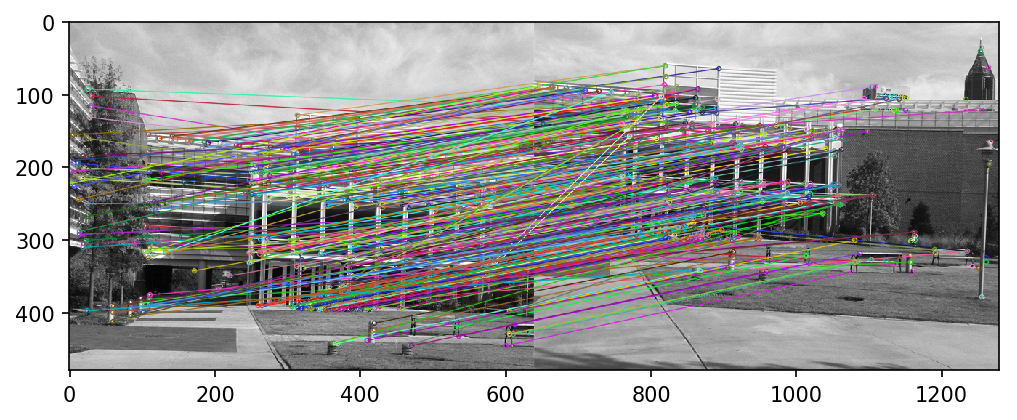

In [157]:
img = cv2.drawMatches(transA, p_a, transB, p_b, matches, None)
fig = plt.figure(figsize=(8, 8), dpi=150,)
plt.imshow(img, cmap='gray')
plt.imsave("match.png", img)

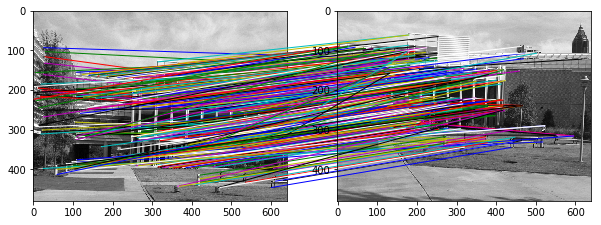

In [174]:

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.imshow(transA,  cmap='gray')
ax2.imshow(transB,  cmap='gray')
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(len(matches)):
    idx_a = matches[i].queryIdx
    idx_b = matches[i].trainIdx

    xyA = p_a[idx_a].pt
    xyB = p_b[idx_b].pt
    con = ConnectionPatch(xyA=xyB, xyB=xyA, coordsA="data", coordsB="data", axesA=ax2, axesB=ax1, color=color[i%8])
    ax2.add_artist(con)
#     ax1.plot(xyA[0],xyA[1],'ro',markersize=1, color=color[i%8])
#     ax2.plot(xyB[0],xyB[1],'ro',markersize=1, color=color[i%8])


plt.show()


In [216]:
def ransac(imgA, imgB, matches):
    matchset = {}
    for i in range(len(matches)):
        idx_a = matches[i].queryIdx
        idx_b = matches[i].trainIdx

        xyA = p_a[idx_a].pt
        xyB = p_b[idx_b].pt
        trans = np.array([xyA[0] - xyB[0], xyA[1] - xyB[1]])
        matchset[(xyA, xyB)] = []
        for j in range(len(matches)):
            idx_a = matches[j].queryIdx
            idx_b = matches[j].trainIdx

            curr_xyA = p_a[idx_a].pt
            curr_xyB = p_b[idx_b].pt
            trans_new = np.array([curr_xyA[0] - curr_xyB[0], curr_xyA[1] - curr_xyB[1]])
            if np.linalg.norm(trans_new - trans) < 10:
                matchset[(xyA, xyB)].append((curr_xyA, curr_xyB))
                
    return matchset
matchset = ransac(transA, transB, matches)


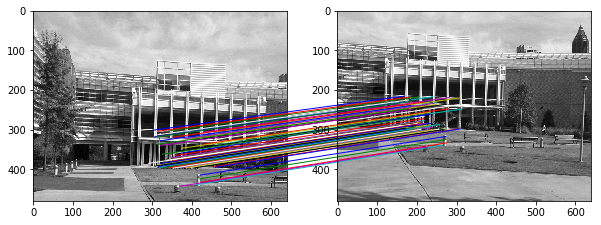

In [217]:
key, value = max(matchset.items(), key= lambda x: len(x[1]))

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax1.imshow(transA,  cmap='gray')
ax2.imshow(transB,  cmap='gray')
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

for i in range(len(value)):
    xyA = value[i][0]
    xyB = value[i][1]

    con = ConnectionPatch(xyA=xyB, xyB=xyA, coordsA="data", coordsB="data", axesA=ax2, axesB=ax1, color=color[i%8])
    ax2.add_artist(con)